## Select region of the ocean
Code select some region of the ocean and save data from there

In [1]:
import xarray as xr
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt


In [2]:
# using the previously downloaded files
ds = xr.open_dataset('data/gdp_fullset_with_filtered.nc')
ds.load()

<xarray.Dataset>
Dimensions:                (traj: 17324, obs: 165754333)
Coordinates:
    ID                     (traj) int64 2578 2582 2583 ... 61493010 61493020
    lon                    (obs) float32 -47.95 -47.96 -47.96 ... 32.84 32.84
    lat                    (obs) float32 47.48 47.47 47.45 ... -25.54 -25.54
    time                   (obs) datetime64[ns] 2005-04-15T20:00:00 ... 2016-...
    ids                    (obs) int64 2578 2578 2578 ... 61493020 61493020
Dimensions without coordinates: traj, obs
Data variables: (12/56)
    rowsize                (traj) int64 5137 4289 1024 1095 ... 14769 16695 5209
    location_type          (traj) int8 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1
    WMO                    (traj) int32 4400505 4400506 0 ... 1601501 1601502
    expno                  (traj) int32 9046 9046 46 9046 ... 20921 20921 20921
    deploy_date            (traj) datetime64[ns] 2005-04-15 ... 2016-04-09
    deploy_lon             (traj) float32 -48.0 -52.0 -50.02 ... 65.0 75.4 54.3
    ...                     ...
    err_sst2               (obs) float32 0.03 0.027 0.021 0.016 ... nan nan nan
    flg_sst                (obs) int8 5 5 5 5 5 5 5 5 5 5 ... 0 0 0 0 0 0 0 0 0
    flg_sst1               (obs) int8 5 5 5 5 5 5 5 5 5 5 ... 0 0 0 0 0 0 0 0 0
    flg_sst2               (obs) int8 5 5 5 5 2 2 2 5 5 5 ... 0 0 0 0 0 0 0 0 0
    u_lp                   (obs) float64 -0.1712 -0.1206 ... -0.02866 -0.0293
    v_lp                   (obs) float64 0.2094 0.1201 ... 0.09597 0.09665
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-06-27T13:53:17.908246
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [3]:
# Open the binned stats to select region

ds_stats = xr.open_dataset('data/binned_stats.nc')

In [4]:
def retrieve_region(ds, lon: list = None, lat: list = None, time: list = None) -> xr.Dataset:
    '''Subset the dataset for a region in space and time
    
    Args:
        ds: xarray Dataset
        lon: longitude slice of the subregion
        lat: latitude slice of the subregion
        time: tiem slice of the subregion
    
    Returns: 
        ds_subset: Dataset of the subregion
    '''
    
    # define the mask for the 'obs' dimension
    mask = np.ones(ds.dims['obs'], dtype='bool')

    if lon:
        mask &= (ds.coords['lon'] >= lon[0]).values
        mask &= (ds.coords['lon'] <= lon[1]).values

    if lat:
        mask &= (ds.coords['lat'] >= lat[0]).values
        mask &= (ds.coords['lat'] <= lat[1]).values

    if time:
        mask &= (ds.coords['time'] >= np.datetime64(time[0])).values
        mask &= (ds.coords['time'] <= np.datetime64(time[1])).values
    
    # define the mask for the 'traj' dimension using the ID numbers from the masked observation
    mask_id = np.in1d(ds.ID, np.unique(ds.ids[mask]))
    ds_subset = ds.isel(obs=np.where(mask)[0], traj=np.where(mask_id)[0])

    return ds_subset.compute()

In [5]:
# Select some region to do ands_statss

# ACC
#lon = [-15, 5]
#lat = [-55, -35]

# Agulhas
lon = [-35, 5]
lat = [-40, -25]

# N Atl
#lon= [-70, -30]
#lat= [20, 30]

day0 = datetime(2000,1,1).strftime('%Y-%m-%d')
day1 = datetime(2020,12,31).strftime('%Y-%m-%d')
days = [day0, day1]
ds_subset = retrieve_region(ds, lon, lat, days)

In [6]:
ds_subset

<xarray.Dataset>
Dimensions:                (traj: 669, obs: 6860371)
Coordinates:
    ID                     (traj) int64 9222 9394 12221 ... 66978210 66979210
    lon                    (obs) float32 -26.45 -26.46 -26.47 ... 4.073 4.063
    lat                    (obs) float32 -39.99 -39.98 -39.96 ... -29.96 -29.95
    time                   (obs) datetime64[ns] 2000-01-28T03:00:00 ... 2020-...
    ids                    (obs) int64 9222 9222 9222 ... 66979210 66979210
Dimensions without coordinates: traj, obs
Data variables: (12/56)
    rowsize                (traj) int64 24951 13249 10326 ... 12539 12547 12547
    location_type          (traj) int8 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1
    WMO                    (traj) int32 3300560 0 1500608 ... 3301608 3301610
    expno                  (traj) int32 243 2065 9325 7325 ... 2222 2222 2222
    deploy_date            (traj) datetime64[ns] 1999-09-20 ... 2018-10-25
    deploy_lon             (traj) float32 -40.12 19.43 15.33 ... -56.1 -53.4
    ...                     ...
    err_sst2               (obs) float32 0.07 0.066 0.051 ... 0.015 0.017 0.018
    flg_sst                (obs) int8 5 5 5 5 5 5 5 5 5 5 ... 5 5 5 5 5 5 5 5 5
    flg_sst1               (obs) int8 5 5 5 5 5 5 5 5 5 5 ... 5 5 5 5 5 5 5 5 5
    flg_sst2               (obs) int8 5 5 5 5 5 5 5 5 5 5 ... 5 5 5 2 2 5 5 5 5
    u_lp                   (obs) float64 -0.1789 -0.1772 ... -0.2405 -0.2483
    v_lp                   (obs) float64 0.2923 0.2933 ... 0.05505 0.05044
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-06-27T13:53:17.908246
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [7]:
fname = 'data/gdp_subset_with_filtered_lon_' + str(lon[0])+  '_to_' + str(lon[1]) + '_lat_' + str(lat[0])+  '_to_' + str(lat[1]) + '.nc'

ds_subset.to_netcdf(fname)

/home/dbalwada/miniconda/envs/GDP_earthcube/lib/python3.9/site-packages/xarray/core/computation.py:727: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


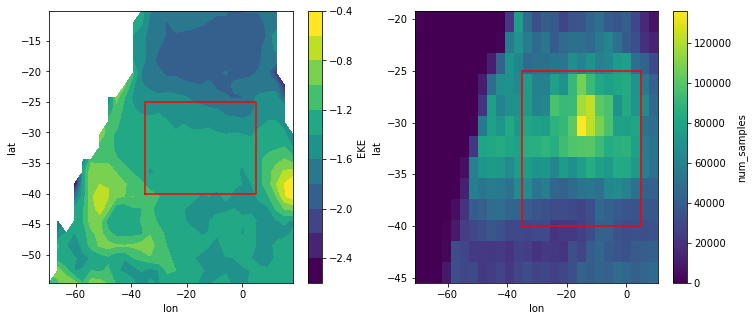

In [8]:
plt.figure(figsize= (12,5))

plt.subplot(121)
np.log10(ds_stats.EKE).sel(lon=slice(lon[0]-35, lon[1]+15), 
                 lat=slice(lat[0]-15, lat[1]+15)).plot.contourf(levels= 15) #, vmax=0.2)

y = [lat[0], lat[0], lat[1], lat[1], lat[0]]
x = [lon[0], lon[1], lon[1], lon[0], lon[0]]

plt.plot(x,y, color='red')

plt.subplot(122)
ds_stats.num_samples.sel(lon=slice(lon[0]-35, lon[1]+5), 
                 lat=slice(lat[0]-5, lat[1]+5)).plot()
plt.plot(x,y, color='red')


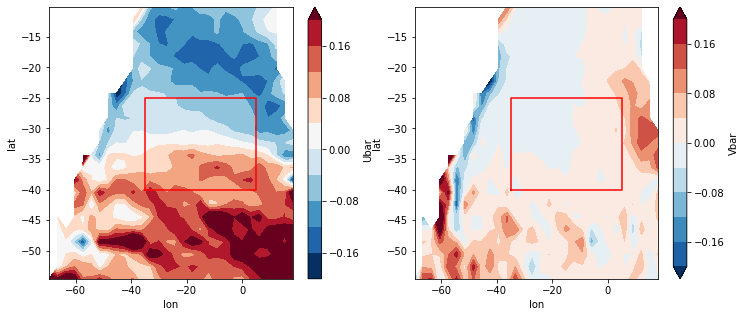

In [10]:
plt.figure(figsize= (12,5))

plt.subplot(121)
ds_stats.Ubar.sel(lon=slice(lon[0]-35, lon[1]+15), 
                 lat=slice(lat[0]-15, lat[1]+15)).plot.contourf(levels= 11, vmax=0.2)

y = [lat[0], lat[0], lat[1], lat[1], lat[0]]
x = [lon[0], lon[1], lon[1], lon[0], lon[0]]

plt.plot(x,y, color='red')

plt.subplot(122)
ds_stats.Vbar.sel(lon=slice(lon[0]-35, lon[1]+15), 
                 lat=slice(lat[0]-15, lat[1]+15)).plot.contourf(levels= 11, vmax=0.2)
plt.plot(x,y, color='red')